# Generate routes

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

In [2]:
data_stops = pd.read_csv('data/uni_molde_v3.csv', sep=';')

data_stops
data_stops.loc[data_stops['stop_completed_at'].isna(), 'stop_completed_at'] = "-1"
data_stops.loc[data_stops['stop_arrived_at'].isna(), 'stop_arrived_at'] = "-1"

print(data_stops.isnull().sum())


sorted_data_stops = data_stops.sort_values(by='stop_dispatched_at', ascending=True)
sorted_data_stops = sorted_data_stops.reset_index(drop=True)
sorted_data_stops['day_of_week'] = pd.to_datetime(sorted_data_stops['stop_dispatched_at']).dt.day_name()
sorted_data_stops['date'] = pd.to_datetime(sorted_data_stops['stop_dispatched_at']).dt.date

#clustering
locations_df = sorted_data_stops[['current_lat', 'current_lng']]
kmeans = KMeans(n_clusters=1000, random_state=42)
kmeans.fit(locations_df)
sorted_data_stops['cluster'] = kmeans.labels_ + 1

sorted_data_stops['location_id_craft'] = sorted_data_stops.groupby(['current_lat', 'current_lng']).ngroup()+1
with open('output.txt', 'w') as f:
    print(sorted_data_stops.to_string(), file=f)
print('number of groups', sorted_data_stops['location_id_craft'].nunique())

# data_stops_day= sorted_data_stops[sorted_data_stops['day_of_week'] == "Wednesday"]
grouped_df = sorted_data_stops.groupby('driver_workday_id')[['driver_id', 'location_type_id', 'address_id', 'stop_dispatched_at', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'stop_completed_at', 'cluster', 'location_id_craft','day_of_week', 'date', 'location_is_depot']].apply(lambda x: pd.Series({
    'driver_id': x['driver_id'].tolist(),
    'location_type_id': x['location_type_id'].tolist(),
    'planned_route_location': x['address_id'].tolist(),
    'stop_dispatched_at': x['stop_dispatched_at'].tolist(),
    'stop_arrived_at': x['stop_arrived_at'].tolist(),
    'stop_earliest': x['stop_earliest'].tolist(),
    'stop_latest': x['stop_latest'].tolist(),
    'current_lat': x['current_lat'].tolist(),
    'current_lng': x['current_lng'].tolist(),
    'stop_completed_at': x['stop_completed_at'].tolist(),
    'planned_route_cluster': x['cluster'].tolist(),
    'planned_route_craft': x['location_id_craft'].tolist(),
    'day_of_week': x['day_of_week'].tolist(),
    'location_is_depot': x['location_is_depot'].tolist(),
    'date': x['date'].tolist()
})).reset_index()
grouped_df

stop_completed_at         0
stop_arrived_at           0
stop_latest               0
stop_earliest             0
stop_dispatched_at        0
location_id               0
location_type_id          0
driver_workday_id         0
address_id                0
location_is_depot         0
driver_id                 0
current_lat               0
current_lng               0
prev_planned_lat      27440
prev_planned_lng      27440
prev_actual_lat       27440
prev_actual_lng       27440
dtype: int64
number of groups 11589


,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,location_is_depot,date
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.6465393, 55.6669147, 55.676665, 55.6757322...","[12.1522978, 12.5262801, 12.566428, 12.5619711...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[5, 777, 11, 728, 728, 281, 281, 281, 281, 405]","[1169, 1405, 1577, 1560, 1479, 1391, 1434, 141...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.662018, 55.662429, 55.6727433,...","[12.1522978, 12.360745, 12.363469, 12.3935111,...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[5, 676, 676, 883, 676, 676, 676]","[1169, 1352, 1356, 1508, 1350, 1312, 1401]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, False]","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
2,297908,"[1176, 1176, 1176, 1176, 1176, 1176, 1176, 117...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[122267, 120515, 119217, 119215, 119170, 13445...","[2024-01-01 21:25:47.230131+00, 2024-01-01 21:...","[2024-01-01 23:06:27.627368+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.619592, 55.636304, 55.631888, ...","[12.1522978, 12.028735, 12.044857, 12.055067, ...","[2024-01-01 23:06:36.064172+00, 2024-01-02 01:...","[5, 845, 443, 443, 634, 699, 787, 787, 787, 78...","[1169, 960, 1049, 1026, 982, 916, 1284, 1281, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
3,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.6465393, 54.65117396302384, 54.666191, 54....","[12.1522978, 11.375901220879824, 11.333044, 11...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[5, 872, 77, 77, 77, 77, 77, 77, 533, 872]","[1169, 7, 23, 23, 23, 23, 23, 23, 12, 4]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
4,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.62296, 55.562168, 55.6381577, ...","[12.1522978, 12.615835, 12.576841, 12.6515491,...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[5, 286, 472, 139, 266, 405, 405, 178, 359, 57...","[1169, 965, 818, 1070, 1658, 1168, 1166, 888, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False

In [3]:
from geopy.distance import geodesic
import pandas as pd

# Function to calculate distance between two coordinates
def calculate_distance(row):
    distances = []
    for i in range(len(row['planned_route_craft'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances
def calculate_distance_actual(row):
    distances = []
    for i in range(len(row['actual_route_location'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances

# Create a new column 'distance_route' in 'final_routes'
grouped_df['distance_route'] = grouped_df.apply(calculate_distance, axis=1)

In [4]:
grouped_df['total_distance_planned'] = grouped_df['distance_route'].apply(sum)
grouped_df

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,location_is_depot,date,distance_route,total_distance_planned
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.6465393, 55.6669147, 55.676665, 55.6757322...","[12.1522978, 12.5262801, 12.566428, 12.5619711...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[5, 777, 11, 728, 728, 281, 281, 281, 281, 405]","[1169, 1405, 1577, 1560, 1479, 1391, 1434, 141...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[14.694940475474436, 1.7084597707961175, 0.185...",19.039848
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.662018, 55.662429, 55.6727433,...","[12.1522978, 12.360745, 12.363469, 12.3935111,...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[5, 676, 676, 883, 676, 676, 676]","[1169, 1352, 1356, 1508, 1350, 1312, 1401]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, False]","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[8.223311758249285, 0.11025550750368773, 1.374...",12.124804
2,297908,"[1176, 1176, 1176, 1176, 1176, 1176, 1176, 117...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[122267, 120515, 119217, 119215, 119170, 13445...","[2024-01-01 21:25:47.230131+00, 2024-01-01 21:...","[2024-01-01 23:06:27.627368+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.619592, 55.636304, 55.631888, ...","[12.1522978, 12.028735, 12.044857, 12.055067, ...","[2024-01-01 23:06:36.064172+00, 2024-01-02 01:...","[5, 845, 443, 443, 634, 699, 787, 787, 787, 78...","[1169, 960, 1049, 1026, 982, 916, 1284, 1281, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[5.182600931419761, 1.3171408361998556, 0.5029...",56.772919
3,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.6465393, 54.65117396302384, 54.666191, 54....","[12.1522978, 11.375901220879824, 11.333044, 11...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[5, 872, 77, 77, 77, 77, 77, 77, 533, 872]","[1169, 7, 23, 23, 23, 23, 23, 23, 12, 4]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[75.41095073521456, 2.0081266994719744, 0.0, 0...",79.685240
4,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.62296, 55.562168, 55.6381577, ...","[12.1522978, 1

In [5]:
routes = grouped_df[grouped_df.apply(lambda row: max(row['stop_dispatched_at']) < min(row['stop_completed_at']), axis=1)]
routes = routes.reset_index(drop=True)
len(routes)

20692

In [6]:
index_routes_with_na = []
for i in range(len(routes)):
    row = routes.iloc[i]
    if "-1" in row['stop_arrived_at']:
        index_routes_with_na.append(i)
print("The number of routes where one value is NA(arrived time)", len(index_routes_with_na))
print(index_routes_with_na)
routes = routes.drop(index_routes_with_na)
routes.reset_index(drop=True)

The number of routes where one value is NA(arrived time) 23
[1187, 1464, 1688, 1746, 2113, 3424, 3880, 4471, 4974, 5098, 5172, 5182, 5540, 5787, 6476, 7626, 10793, 11161, 11621, 13845, 17739, 19786, 20033]


,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,location_is_depot,date,distance_route,total_distance_planned
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.6465393, 55.6669147, 55.676665, 55.6757322...","[12.1522978, 12.5262801, 12.566428, 12.5619711...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[5, 777, 11, 728, 728, 281, 281, 281, 281, 405]","[1169, 1405, 1577, 1560, 1479, 1391, 1434, 141...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[14.694940475474436, 1.7084597707961175, 0.185...",19.039848
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.662018, 55.662429, 55.6727433,...","[12.1522978, 12.360745, 12.363469, 12.3935111,...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[5, 676, 676, 883, 676, 676, 676]","[1169, 1352, 1356, 1508, 1350, 1312, 1401]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, False]","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[8.223311758249285, 0.11025550750368773, 1.374...",12.124804
2,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.6465393, 54.65117396302384, 54.666191, 54....","[12.1522978, 11.375901220879824, 11.333044, 11...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[5, 872, 77, 77, 77, 77, 77, 77, 533, 872]","[1169, 7, 23, 23, 23, 23, 23, 23, 12, 4]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[75.41095073521456, 2.0081266994719744, 0.0, 0...",79.685240
3,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.62296, 55.562168, 55.6381577, ...","[12.1522978, 12.615835, 12.576841, 12.6515491,...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[5, 286, 472, 139, 266, 405, 405, 178, 359, 57...","[1169, 965, 818, 1070, 1658, 1168, 1166, 888, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[18.213184104634966, 4.474441733294021, 6.0165...",54.345069
4,297922,"[1192, 1192, 1192, 1192, 1192, 1192, 1192, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119416, 119195, 119179, 119149, 11918...","[2024-01-01 19:36:39.7416+00, 2024-01-01 19:36...","[2024-01-01 23:00:15.671794+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.646256, 55.652754, 55.654614, ...","[12.1522978, 12.11

In [7]:
#check if it is the same driver in the route
for i in routes['driver_id']:
    if not all(x == i[0] for x in i):
            print('Not the same driver in the route')
routes['driver_id'] = routes['driver_id'].apply(lambda x : x[0])

routes['day_of_week'] = routes['day_of_week'].apply(lambda x : x[0])
routes['date'] = routes['date'].apply(lambda x : x[0])

routes['date'] = pd.to_datetime(routes['date'])
routes['last_two_weeks_count'] = routes.apply(lambda row:
                                      routes[(routes['driver_id'] == row['driver_id']) &
                                         (row['date'] - routes['date']).dt.days.between(-14, 0)].shape[0],
                                      axis=1)
routes = routes[(routes['date'] < '2024-01-01') | (routes['date'] > '2024-01-14')]
routes['location_type_id'] = routes['location_type_id'].apply(lambda x: [0 if i == 1 else 1 for i in x])
routes['location_is_depot'] = routes['location_is_depot'].apply(lambda x: [int(value) for value in x])




In [8]:
routes = routes.reset_index(drop=True)

In [9]:
def create_actual_route(df, column):
    res_col = []
    for i in range(len(df)):
        row = df.iloc[i]
        sorted_dates = sorted(row['stop_arrived_at'])
        mapping = {}
        for i, date in enumerate(sorted_dates):
            mapping[date] = row[column][i]
        res_val = [mapping[row['stop_arrived_at'][i]] for i in range(len(row['stop_arrived_at']))]
        res_col.append(res_val)
    return res_col

routes['actual_route_location'] = create_actual_route(routes, 'planned_route_craft')
routes['distance_actual_route'] = routes.apply(calculate_distance_actual, axis=1)
routes['total_distance_actual'] = routes['distance_actual_route'].apply(sum)
routes['difference_distance'] = (routes['total_distance_actual'] - routes['total_distance_planned'])/routes['total_distance_planned']

#remove all the routes with length <= 2
routes = routes[routes['planned_route_location'].apply(lambda x: len(x) > 2)]
routes = routes.reset_index(drop=True)

In [10]:
routes['location_is_depot']

0                                            [0, 0, 0]
1                                      [0, 1, 0, 0, 0]
2                                         [1, 0, 0, 0]
3                                         [1, 0, 1, 0]
4                                            [1, 0, 0]
                             ...                      
18574    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18575          [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18576                            [1, 0, 0, 0, 0, 0, 0]
18577                                     [1, 0, 1, 0]
18578             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Name: location_is_depot, Length: 18579, dtype: object

In [11]:
planned_routes = routes[['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'last_two_weeks_count', 'location_type_id', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'difference_distance', 'distance_route', 'location_is_depot', 'location_type_id']]
actual_routes = routes['actual_route_location']

In [12]:
planned_routes_list = planned_routes['planned_route_craft'].tolist()
actual_routes_list = actual_routes.tolist()

# filtered_rows = []
#
# for row in actual_routes_list:
#     if row not in planned_routes_list:
#         filtered_rows.append(row)

#duplicated removed
# planned_routes_list = [array for i, array in enumerate(planned_routes_list) if array not in planned_routes_list[:i]]
# actual_routes_list = [array for i, array in enumerate(filtered_rows) if array not in filtered_rows[:i]]
len(planned_routes_list),len(actual_routes_list)

(18579, 18579)

In [13]:
planned_routes

,planned_route_craft,actual_route_location,driver_id,day_of_week,last_two_weeks_count,location_type_id,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,difference_distance,distance_route,location_is_depot,location_type_id
0,"[5561, 4250, 4252]","[5561, 4250, 4252]",428,Wednesday,4,"[0, 1, 1]","[2024-01-02 07:45:25.310456+00, 2024-01-02 11:...","[2024-01-02 05:00:00+00, 2024-01-02 05:00:00+0...","[2024-01-02 21:00:00+00, 2024-01-02 21:00:00+0...","[59.47300010000001, 58.623884, 58.627029]","[10.3183178, 8.910826, 8.856357]",0.000000,"[77.28853393240367, 1.978373586155687]","[0, 0, 0]","[0, 1, 1]"
1,"[5561, 5558, 4743, 4955, 5808]","[5561, 5558, 4743, 4955, 5808]",429,Thursday,5,"[0, 0, 1, 1, 1]","[2024-01-02 11:55:45.831433+00, 2024-01-02 11:...","[2024-01-02 05:00:00+00, 2024-01-02 05:00:00+0...","[2024-01-02 21:00:00+00, 2024-01-02 18:00:00+0...","[59.47300010000001, 59.471681, 59.207043, 59.2...","[10.3183178, 10.318716, 10.306366, 10.256478, ...",0.000000,"[0.09238270951687778, 18.32380796956901, 3.541...","[0, 1, 0, 0, 0]","[0, 0, 1, 1, 1]"
2,"[11372, 11523, 11524, 11530]","[11372, 11523, 11524, 11530]",813,Friday,2,"[0, 1, 1, 1]","[2024-01-04 10:40:24.453637+00, 2024-01-04 10:...","[2024-01-02 06:00:00+00, 2024-01-02 06:00:00+0...","[2024-01-03 15:00:00+00, 2024-01-03 15:00:00+0...","[63.43263220000001, 64.860785, 64.861066, 64.8...","[10.3643774, 11.62453, 11.621855, 11.2369739]",0.000000,"[106.01131106955373, 0.08118943182044898, 11.4...","[1, 0, 0, 0]","[0, 1, 1, 1]"
3,"[11372, 5561, 11372, 5561]","[11372, 5561, 11372, 5561]",1004,Friday,1,"[0, 1, 0, 1]","[2024-01-04 10:40:25.056135+00, 2024-01-04 10:...","[2024-01-02 08:00:00+00, 2024-01-02 08:00:00+0...","[2024-01-02 23:00:00+00, 2024-01-02 23:00:00+0...","[63.43263220000001, 59.47300010000001, 63.4326...","[10.3643774, 10.3183178, 10.3643774, 10.3183178]",0.000000,"[274.1824232018611, 274.1824232018611, 274.182...","[1, 0, 1, 0]","[0, 1, 0, 1]"
4,"[11372, 11496, 11451]","[11372, 11496, 11451]",662,Friday,3,"[0, 1, 1]","[2024-01-02 06:57:01.591308+00, 2024-01-02 10:...","[2024-01-02 06:00:00+00, 2024-01-02 06:00:00+0...","[2024-01-02 15:00:00+00, 2024-01-02 15:00:00+0...","[63.43263220000001, 64.0212619, 63.711729]","[10.3643774, 11.4841413, 11.16247]",0.000000,"[53.32959024614898, 23.585260805775995]","[1, 0, 0]","[0, 1, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18574,"[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...","[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...",276,Tuesday,1,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[2024-08-07 13:31:52.955936+00, 2024-08-07 13:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 14:00:00+00, 2024-08-07 11:00:00+0...","[60.007627, 60.01175632293701, 59.950832, 59.9...","[11.047135, 11.052440556594831, 10.856852, 10....",0.000000,"[0.3399120416382811, 7.9893719361707864, 1.229...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
18575,"[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...","[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...",968,Tuesday,2,"[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]","[2024-08-07 03:50:55.931321+00, 2024-08-07 05:...","[2024-08-07 02:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 20:00:00+00, 2024-08-07 07:00:00+0...","[59.805664, 59.749221, 59.747942, 59.737167777...","[10.290383, 10.26819, 10.291249, 10.3725904226...",-0.039707,"[3.9833740421767767, 0.8104231018807364, 2.938...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]"
18576,"[10076, 8785, 9172, 7204, 6955, 5902, 7045]","[10076, 8785, 9172, 7204, 6955, 5902, 7045]",877,Tuesday,1,"[0, 1, 1, 1, 1, 1, 1]","[2024-08-07 13:31:50.711864+00, 2024-08-07 13:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 14:00:00+00, 2024-08-07 11:00:00+0...","[60.007627, 59.923836, 59.93422, 59.811373, 59...","[11.047135, 10.814451, 10.800594, 10.80755, 10...",0.000000,"[9.94338251969985, 0.8652

# Edit distance

In [14]:
# Edit Distance

def minDistance(word1, word2) -> int:
    m = len(word1)
    n = len(word2)
    # dp[i][j] := min # Of operations to convert word1[0..i) to word2[0..j)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
      dp[i][0] = i

    for j in range(1, n + 1):
      dp[0][j] = j

    for i in range(1, m + 1):
      for j in range(1, n + 1):
        if word1[i - 1] == word2[j - 1]:
          dp[i][j] = dp[i - 1][j - 1]
        else:
          dp[i][j] = min(dp[i - 1][j - 1], dp[i - 1][j], dp[i][j - 1]) + 1

    return dp[m][n]

print(minDistance([878, 1526, 1613, 1706, 1857, 1777], [878, 1526, 1706, 1613, 1777, 1857]))

3


# Route quality score

In [15]:
def calculate_route_quality_score(planned_ranks, actual_ranks):
    # Calculate sum of absolute differences in ranks
    sum_of_differences = sum(abs(actual_ranks.index(x) - planned_ranks.index(x)) for x in planned_ranks)

    # Calculate max possible difference
    max_possible_difference = sum([abs(2 * i - (len(planned_ranks) + 1)) for i in range(1, len(planned_ranks) + 1)])

    # Calculate route quality score
    route_quality_score = 1 - (sum_of_differences / max_possible_difference)

    return route_quality_score

In [16]:
planned_routes_list[1227], actual_routes_list[1227]

([7166,
  7166,
  7716,
  8807,
  8313,
  8518,
  8392,
  8127,
  8569,
  8738,
  9491,
  9226,
  9869,
  10231,
  9632,
  9534,
  7433,
  7166,
  7166],
 [7166,
  7166,
  7716,
  8807,
  8518,
  8313,
  8127,
  8392,
  8569,
  8738,
  9491,
  9632,
  10231,
  9869,
  9226,
  9534,
  7433,
  7166,
  7166])

For each driver-day, we consider only the planned route. For each planned route we calculate how much it deviates from the actual route (e.g., use some form of edit distance - see https://link.springer.com/article/10.1007/s10732-006-9001-3?), which is then normalized (divide by max edit distance, or number of visits or something?) to the interval [0, 1]. Then, a planned route is good if this distance (between planned and actual) is less than a certain threshold and otherwise it is bad. This becomes the label (bad/good)

In [23]:
import statistics
completed_routes_df = pd.DataFrame(columns=['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'distance_route', 'last_two_weeks_count', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'location_type_id', 'location_is_depot'])
uncompleted_routes_df = pd.DataFrame(columns=['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'distance_route', 'last_two_weeks_count', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'location_type_id', 'location_is_depot'])
#11700795
scores = []
edit_distances = []
completed_routes_list = []
uncompleted_routes_list = []
for i in range(len(planned_routes_list)):
    editDistance = minDistance(planned_routes_list[i], actual_routes_list[i]) / len(planned_routes_list[i])
    score = calculate_route_quality_score(planned_routes_list[i], actual_routes_list[i])
    scores.append(score)
    edit_distances.append(editDistance)

    if editDistance > 0.05 and score < 0.95 and planned_routes['difference_distance'].iloc[i] > 0.01:
        uncompleted_routes_list.append(planned_routes.iloc[i].to_dict())
    else:
        completed_routes_list.append(planned_routes.iloc[i].to_dict())

# Convert the lists to DataFrames
completed_routes_df = pd.DataFrame(completed_routes_list)
uncompleted_routes_df = pd.DataFrame(uncompleted_routes_list)

print(len(completed_routes_df), len(uncompleted_routes_df))
completed_routes_df

9736 8843


,planned_route_craft,actual_route_location,driver_id,day_of_week,last_two_weeks_count,location_type_id,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,difference_distance,distance_route,location_is_depot
0,"[5561, 4250, 4252]","[5561, 4250, 4252]",428,Wednesday,4,"[0, 1, 1]","[2024-01-02 07:45:25.310456+00, 2024-01-02 11:...","[2024-01-02 05:00:00+00, 2024-01-02 05:00:00+0...","[2024-01-02 21:00:00+00, 2024-01-02 21:00:00+0...","[59.47300010000001, 58.623884, 58.627029]","[10.3183178, 8.910826, 8.856357]",0.000000,"[77.28853393240367, 1.978373586155687]","[0, 0, 0]"
1,"[5561, 5558, 4743, 4955, 5808]","[5561, 5558, 4743, 4955, 5808]",429,Thursday,5,"[0, 0, 1, 1, 1]","[2024-01-02 11:55:45.831433+00, 2024-01-02 11:...","[2024-01-02 05:00:00+00, 2024-01-02 05:00:00+0...","[2024-01-02 21:00:00+00, 2024-01-02 18:00:00+0...","[59.47300010000001, 59.471681, 59.207043, 59.2...","[10.3183178, 10.318716, 10.306366, 10.256478, ...",0.000000,"[0.09238270951687778, 18.32380796956901, 3.541...","[0, 1, 0, 0, 0]"
2,"[11372, 11523, 11524, 11530]","[11372, 11523, 11524, 11530]",813,Friday,2,"[0, 1, 1, 1]","[2024-01-04 10:40:24.453637+00, 2024-01-04 10:...","[2024-01-02 06:00:00+00, 2024-01-02 06:00:00+0...","[2024-01-03 15:00:00+00, 2024-01-03 15:00:00+0...","[63.43263220000001, 64.860785, 64.861066, 64.8...","[10.3643774, 11.62453, 11.621855, 11.2369739]",0.000000,"[106.01131106955373, 0.08118943182044898, 11.4...","[1, 0, 0, 0]"
3,"[11372, 5561, 11372, 5561]","[11372, 5561, 11372, 5561]",1004,Friday,1,"[0, 1, 0, 1]","[2024-01-04 10:40:25.056135+00, 2024-01-04 10:...","[2024-01-02 08:00:00+00, 2024-01-02 08:00:00+0...","[2024-01-02 23:00:00+00, 2024-01-02 23:00:00+0...","[63.43263220000001, 59.47300010000001, 63.4326...","[10.3643774, 10.3183178, 10.3643774, 10.3183178]",0.000000,"[274.1824232018611, 274.1824232018611, 274.182...","[1, 0, 1, 0]"
4,"[11372, 11496, 11451]","[11372, 11496, 11451]",662,Friday,3,"[0, 1, 1]","[2024-01-02 06:57:01.591308+00, 2024-01-02 10:...","[2024-01-02 06:00:00+00, 2024-01-02 06:00:00+0...","[2024-01-02 15:00:00+00, 2024-01-02 15:00:00+0...","[63.43263220000001, 64.0212619, 63.711729]","[10.3643774, 11.4841413, 11.16247]",0.000000,"[53.32959024614898, 23.585260805775995]","[1, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9731,"[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...","[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...",276,Tuesday,1,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[2024-08-07 13:31:52.955936+00, 2024-08-07 13:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 14:00:00+00, 2024-08-07 11:00:00+0...","[60.007627, 60.01175632293701, 59.950832, 59.9...","[11.047135, 11.052440556594831, 10.856852, 10....",0.000000,"[0.3399120416382811, 7.9893719361707864, 1.229...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9732,"[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...","[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...",968,Tuesday,2,"[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]","[2024-08-07 03:50:55.931321+00, 2024-08-07 05:...","[2024-08-07 02:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 20:00:00+00, 2024-08-07 07:00:00+0...","[59.805664, 59.749221, 59.747942, 59.737167777...","[10.290383, 10.26819, 10.291249, 10.3725904226...",-0.039707,"[3.9833740421767767, 0.8104231018807364, 2.938...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9733,"[10076, 8785, 9172, 7204, 6955, 5902, 7045]","[10076, 8785, 9172, 7204, 6955, 5902, 7045]",877,Tuesday,1,"[0, 1, 1, 1, 1, 1, 1]","[2024-08-07 13:31:50.711864+00, 2024-08-07 13:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 14:00:00+00, 2024-08-07 11:00:00+0...","[60.007627, 59.923836, 59.93422, 59.811373, 59...","[11.047135, 10.814451, 10.800594, 10.80755, 10...",0.000000,"[9.94338251969985, 0.8652097234693148, 8.50777...","[1, 0, 0, 0, 0, 0, 0]"
9734,"[7166, 7127, 7166, 9527]","[7166, 7166, 7127, 9527]",1417,Wednesday,1,"[0, 1, 0, 1]","[2024-08-07 06:38:14.810272+00, 2024-08-07 0

# Build graph for metrics

In [166]:
distances_without_outl = routes[routes['difference_distance'] > 0]['difference_distance']

# Count the number of elements greater than 2
count_more_than_2 = (distances_without_outl > 2).sum()
print(f'Number of elements greater than 2: {count_more_than_2}')

# Remove elements greater than 2
filtered_series = distances_without_outl[distances_without_outl <= 2]
max(filtered_series)

filtered_series

Number of elements greater than 2: 12


8        0.569081
10       0.038663
23       0.006369
25       0.435438
26       0.162129
           ...   
18563    0.138498
18566    0.337309
18569    0.003619
18571    0.031155
18572    0.510986
Name: difference_distance, Length: 10667, dtype: float64

<Figure size 800x600 with 0 Axes>

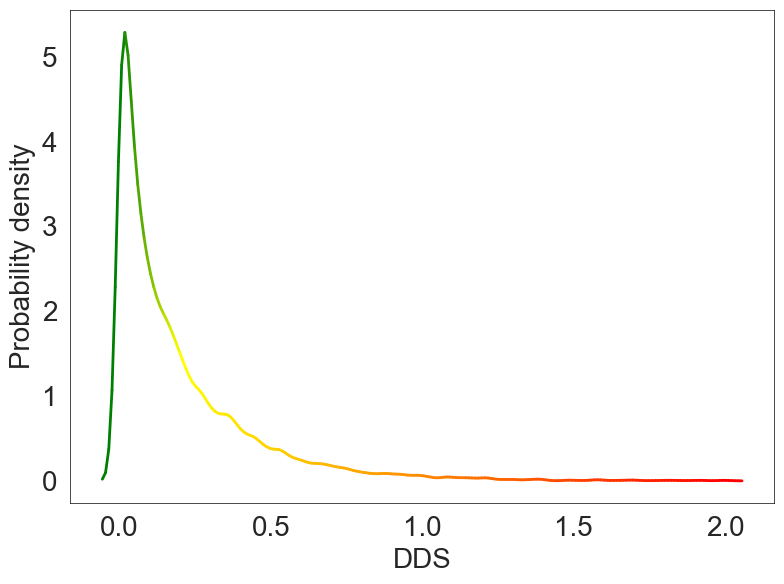

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# scores = [v for v in scores if v != 1]
# scores = pd.DataFrame(scores, columns=['Score'])
# # scores.describe()
#
# edit_distances = [v for v in edit_distances if v != 0]
# edit_distances = pd.DataFrame(edit_distances, columns=['Edit Distances'])
# edit_distances.describe()

# routes[routes['difference_distance'] > 0]['difference_distance'].describe()


# Set style and context for publication-ready figures
sns.set(style='white')

# Create a larger figure
plt.figure(figsize=(8, 6))
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'green_amber_red', [(0, 'green'), (0.1, 'yellow'), (0.4, 'orange'), (1, 'red')]
)

# Normalize the data for color mapping
norm = mpl.colors.Normalize(vmin=0, vmax=2)

# Calculate the KDE
kde = sns.kdeplot(filtered_series, fill=False, bw_adjust=0.5)
x, y = kde.get_lines()[0].get_data()

# Clear the plot to redraw with gradient
plt.clf()

# Set style and context for publication-ready figures
sns.set(style='white')

# Create a larger figure
plt.figure(figsize=(8, 6))

# Plot with gradient color
for i in range(len(x) - 1):
    plt.plot(x[i:i+2], y[i:i+2], color=cmap(norm(np.mean(x[i:i+2]))), linewidth=2)

# Add titles and labels
plt.xlabel('DDS', fontsize=20)
plt.ylabel('Probability density', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=20)  # Major ticks
plt.tick_params(axis='both', which='minor', labelsize=20)  # Minor ticks (if any)

ax = plt.gca()  # Get the current axes
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Color of the border
    spine.set_linewidth(0.5)  # Thickness of the border

plt.tight_layout()
plt.grid(False)  # Remove gridlines

# Display the plot
plt.show()



In [19]:
# Plot the distribution (histogram) of the scores
# plt.hist(scores, bins=10, edgecolor='black')
#
# # Adding titles and labels
# plt.title('Distribution of Scores')
# plt.xlabel('Score')
# plt.ylabel('Frequency')
#
# # Display the plot
# plt.show()

[5561, 4250, 4252]

In [152]:
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# # Assuming your data is in a Pandas DataFrame called 'df'
#
# # Faceted scatter plot
# sns.FacetGrid(completed_routes_df, col="day_of_week", col_wrap=3) \
#     .map(plt.scatter, "driver_id_sorted", "score") \
#     .set_titles("{col_name}")
#
# # Box plot with hue
# sns.boxplot(x="driver_id_sorted", y="score", hue="day_of_week", data=completed_routes_df)
# plt.legend(title="Day of Week")

In [49]:
import folium
def build_route(lat_seq, lon_seq, color, earliest, latest, arrived, location_type_id, file_name, marker_bool = False):
    m = folium.Map(location=[lat_seq[0], lon_seq[0]], zoom_start=13)
    # Add a polyline with arrows
    offset = 0
    for i in range(len(lat_seq)):
        lat, lon = lat_seq[i], lon_seq[i]
        earliest_date = earliest[i]
        latest_date = latest[i]
        arrived_date = arrived[i]
        location_type = location_type_id[i]

        # Determine the marker color based on the arrived date being within the earliest and latest date range
        if marker_bool == False:
            marker_color = 'white'
        else:
            if earliest_date <= arrived_date <= latest_date:
                marker_color = 'green'
            else:
                marker_color = 'red'

        # Add an index label
        folium.Marker([lat + offset * 0.000001, lon + offset * 0.000001], icon=folium.DivIcon(html=f'<div style="font-size: 13pt; border: 1px solid white; border-radius: 50%; width: 1.2em; height: 1.2em; background-color: {marker_color}; border-radius: 50%;text-align: center;text-color: white;">{i+1}</div>')).add_to(m)

        # Add a red square marker for depots
        if location_type == 1:
            folium.Marker([lat + offset * 0.000001, lon + offset * 0.000001], icon=folium.Icon(color='red', icon='square', prefix='fa')).add_to(m)

        if i < len(lat_seq) - 1:
            next_lat, next_lon = lat_seq[i + 1], lon_seq[i + 1]
            angle = np.rad2deg(np.arctan2(next_lat - lat, next_lon - lon))
            arrow_lon = lon + 0.001 * np.cos(np.deg2rad(angle))

            # Add a line segment
            folium.PolyLine([[lat + offset * 0.000001, lon + offset * 0.000001], [next_lat, next_lon]], color=color, dash_array='5, 5').add_to(m)

            # Add an arrow at the end of the line segment
            folium.Marker([next_lat, next_lon], icon=folium.Icon(color=color, icon='arrow-up', prefix='fa')).add_to(m)

        # Increase the offset for the next node with the same location
        offset += 1

    m.save(file_name)

In [50]:
uncompleted_routes_df

,planned_route_craft,actual_route_location,driver_id,day_of_week,distance_route,last_two_weeks_count,location_type_id,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,edit_distance,score,difference_distance
0,"[878, 891, 1114, 1226, 808, 624, 726, 706, 628...","[878, 808, 706, 628, 724, 726, 624, 1226, 1114...",1218,Monday,NaN,11,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 22:37:07.860851+00, 2024-01-16 00:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.647, 55.672, 55.681, 55.638, 55.56...","[12.154, 12.54, 12.589, 12.605, 12.652, 12.577...",0.900000,NaN,23.445392
1,"[878, 828, 810, 969, 836, 825, 638, 952, 996]","[878, 825, 996, 969, 952, 638, 836, 810, 828]",1192,Monday,NaN,11,"[1, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 23:06:33.822316+00, 2024-01-16 01:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 55.64, 55.639, 55.655, 55.641, 55.64,...","[12.154, 12.091, 12.063, 12.093, 12.08, 12.088...",0.777778,NaN,2.970105
2,"[878, 1394, 1394, 1297, 1313, 1321, 1395, 1402...","[878, 1418, 1385, 1394, 1394, 1297, 1313, 1321...",1198,Monday,NaN,8,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 22:08:46.207788+00, 2024-01-16 01:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 08:30:00+0...","[55.646, 55.712, 55.712, 55.693, 55.697, 55.69...","[12.154, 12.542, 12.542, 12.561, 12.567, 12.57...",0.357143,NaN,2.276017
3,"[878, 78, 10, 5, 9, 20, 20, 3, 116]","[878, 78, 9, 10, 20, 3, 20, 5, 116]",1211,Monday,NaN,10,"[1, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-16 00:42:23.685846+00, 2024-01-16 02:...","[2024-01-16 00:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 22:00:00+00, 2024-01-16 04:00:00+0...","[55.646, 54.774, 54.659, 54.651, 54.659, 54.66...","[12.154, 11.501, 11.36, 11.376, 11.352, 11.333...",0.555556,NaN,3.229414
4,"[878, 1643, 1614, 1608, 1688, 1688, 1699, 1704...","[878, 1688, 1614, 1608, 1686, 1692, 1687, 1658...",1324,Monday,NaN,4,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-01-15 08:52:39.86581+00, 2024-01-15 10:1...","[2024-01-15 00:00:00+00, 2024-01-15 08:00:00+0...","[2024-01-15 22:00:00+00, 2024-01-15 12:00:00+0...","[55.646, 55.772, 55.767, 55.764, 55.79, 55.79,...","[12.154, 12.166, 12.182, 12.177, 12.267, 12.26...",0.769231,NaN,6.840802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,"[878, 878, 825, 811, 783, 951, 957, 773, 787, ...","[878, 878, 951, 825, 783, 773, 957, 722, 811, ...",1489,Thursday,NaN,1,"[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2024-04-26 02:58:29.843385+00, 2024-04-26 02:...","[2024-04-25 23:00:00+00, 2024-04-25 23:00:00+0...","[2024-04-26 21:00:00+00, 2024-04-26 21:00:00+0...","[55.646, 55.646, 55.64, 55.639, 55.634, 55.653...","[12.154, 12.154, 12.088, 12.064, 12.017, 11.93...",0.600000,NaN,24.553321
2081,"[2294, 2311, 2397, 2439, 2652, 2643, 2660, 271...","[2294, 2311, 2397, 2439, 2566, 2422, 2624, 270...",1516,Friday,NaN,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2024-04-27 04:41:07.70655+00, 2024-04-27 04:4...","[2024-04-27 00:00:00+00, 2024-04-27 03:00:00+0...","[2024-04-27 16:00:00+00, 2024-04-27 07:00:00+0...","[56.067, 56.079, 56.117, 56.129, 56.155, 56.15...","[9.987, 10.028, 10.141, 10.195, 10.205, 10.206...",0.681818,NaN,2.489366
2082,"[2294, 2435, 2481, 2491, 2454, 2329, 2322, 244...","[2294, 2435, 2329, 2322, 2447, 2404, 2280, 247...",1513,Friday,NaN,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[2024-04-27 02:46:40.196186+00, 2024-04-27 04:...","[2024-04-27 00:00:00+00, 2024-04-27 02:00:00+0...","[2024-04-27 16:00:00+00, 2024-04-27 06:00:00+0...","[56.067, 56.129, 56.134, 56.135, 56.132, 56.09...","[9.987, 9.166, 8.996, 8.988, 8.966, 8.243, 8.2...",0.461538,NaN,10.507922
2083,"[878, 1725, 1725, 1559, 1964, 2152, 2199, 2241...","[878, 1725, 1725, 1559, 1964, 2241, 1991, 1992...",1183,Saturday,NaN,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2,

In [51]:
def draw_planned_route(row_id):
    lats = uncompleted_routes_df["current_lat"].iloc[row_id]
    lngs = uncompleted_routes_df["current_lng"].iloc[row_id]
    earliests = uncompleted_routes_df["stop_earliest"].iloc[row_id]
    latests = uncompleted_routes_df["stop_latest"].iloc[row_id]
    arriveds = uncompleted_routes_df["stop_arrived_at"].iloc[row_id]
    location_types = uncompleted_routes_df["location_type_id"].iloc[row_id]
    build_route(lats, lngs, 'blue', earliests, latests, arriveds, location_types, f'planned_route_{row_id}.html')


In [52]:
def draw_actual_route(row_id):
    mapping = {}
    row = uncompleted_routes_df.iloc[row_id]
    planned_route = row['planned_route_craft']
    actual_route = row['actual_route_location']
    longs = row['current_lng']
    lats = row['current_lat']
    earliest = row['stop_earliest']
    latest = row['stop_latest']
    arrived = row['stop_arrived_at']
    location_type_id = row['location_type_id']

    for i in range(len(planned_route)):
        mapping[planned_route[i]] = (longs[i], lats[i], earliest[i], latest[i],arrived[i], location_type_id[i])

    actual_longs = [mapping[location][0] for location in actual_route]
    actual_lats = [mapping[location][1] for location in actual_route]
    actual_earliest = [mapping[location][2] for location in actual_route]
    actual_latest = [mapping[location][3] for location in actual_route]
    actual_arrived = [mapping[location][4] for location in actual_route]
    actual_location_type_id = [mapping[location][5] for location in actual_route]


    build_route(actual_lats, actual_longs, 'red', actual_earliest, actual_latest, actual_arrived, actual_location_type_id, f'actual_route_{row_id}.html',True)

id = 13
draw_planned_route(id)
draw_actual_route(id)


In [53]:
uncompleted_routes_df["current_lat"].iloc[22], uncompleted_routes_df["current_lng"].iloc[22]

([55.646,
  55.628,
  55.487,
  55.489,
  55.488,
  54.824,
  54.82,
  54.843,
  54.898,
  54.93,
  54.899,
  54.856,
  54.666,
  54.661,
  54.661],
 [12.154,
  12.079,
  12.155,
  12.155,
  12.157,
  12.137,
  12.048,
  11.908,
  11.876,
  11.836,
  11.881,
  11.88,
  11.333,
  11.339,
  11.341])

In [166]:

# uncompleted_routes_df = uncompleted_routes_df.sample(n=len(completed_routes_df), random_state=42)
len(completed_routes_df), len(uncompleted_routes_df)
# completed_routes_df

(3, 0)

In [113]:
# completed_routes_list_unique = [array for i, array in enumerate(completed_routes_list) if array not in completed_routes_list[:i]]
# uncompleted_routes_list_unique = [array for i, array in enumerate(uncompleted_routes_list) if array not in uncompleted_routes_list[:i]]
# len(completed_routes_list_unique), len (uncompleted_routes_list_unique)
# len(completed_routes_df), len(uncompleted_routes_df)

In [217]:
final_routes = pd.DataFrame({
    'routes': completed_routes_df['planned_route_craft'].tolist() + uncompleted_routes_df['planned_route_craft'].tolist(),
    'actual_routes': completed_routes_df['actual_route_location'].tolist() + uncompleted_routes_df['actual_route_location'].tolist(),
    'driver_id': completed_routes_df['driver_id'].tolist() +  uncompleted_routes_df['driver_id'].tolist(),
    'distance_route': completed_routes_df['distance_route'].tolist() + uncompleted_routes_df['distance_route'].tolist(),
    'last_two_weeks_count': completed_routes_df['last_two_weeks_count'].tolist() + uncompleted_routes_df['last_two_weeks_count'].tolist(),
    'current_lat': completed_routes_df['current_lat'].tolist() + uncompleted_routes_df['current_lat'].tolist(),
    'current_lng': completed_routes_df['current_lng'].tolist() + uncompleted_routes_df['current_lng'].tolist(),
    'day_of_week': completed_routes_df['day_of_week'].tolist() + uncompleted_routes_df['day_of_week'].tolist(),
    'location_is_depot': completed_routes_df['location_is_depot'].tolist() + uncompleted_routes_df['location_is_depot'].tolist(),
    'location_type_id': completed_routes_df['location_type_id'].tolist() + uncompleted_routes_df['location_type_id'].tolist(),
    'label': [0] * len(completed_routes_df)  + [1] * len(uncompleted_routes_df)
})
final_routes['len'] = final_routes['routes'].apply(lambda x: len(x))
final_routes

# [0] * len(artificial_planned_routes)
# artificial_planned_routes['distance_route'].tolist()
# artificial_planned_routes['driver_id'].tolist()
# artificial_planned_routes['common_subsequence'].tolist()

,routes,actual_routes,driver_id,distance_route,last_two_weeks_count,current_lat,current_lng,day_of_week,location_is_depot,location_type_id,label,len
0,"[5561, 4250, 4252]","[5561, 4250, 4252]",428,"[77.28853393240367, 1.978373586155687]",4,"[59.47300010000001, 58.623884, 58.627029]","[10.3183178, 8.910826, 8.856357]",Wednesday,"[0, 0, 0]","[0, 1, 1]",0,3
1,"[5561, 5558, 4743, 4955, 5808]","[5561, 5558, 4743, 4955, 5808]",429,"[0.09238270951687778, 18.32380796956901, 3.541...",5,"[59.47300010000001, 59.471681, 59.207043, 59.2...","[10.3183178, 10.318716, 10.306366, 10.256478, ...",Thursday,"[0, 1, 0, 0, 0]","[0, 0, 1, 1, 1]",0,5
2,"[11372, 11523, 11524, 11530]","[11372, 11523, 11524, 11530]",813,"[106.01131106955373, 0.08118943182044898, 11.4...",2,"[63.43263220000001, 64.860785, 64.861066, 64.8...","[10.3643774, 11.62453, 11.621855, 11.2369739]",Friday,"[1, 0, 0, 0]","[0, 1, 1, 1]",0,4
3,"[11372, 5561, 11372, 5561]","[11372, 5561, 11372, 5561]",1004,"[274.1824232018611, 274.1824232018611, 274.182...",1,"[63.43263220000001, 59.47300010000001, 63.4326...","[10.3643774, 10.3183178, 10.3643774, 10.3183178]",Friday,"[1, 0, 1, 0]","[0, 1, 0, 1]",0,4
4,"[11372, 11496, 11451]","[11372, 11496, 11451]",662,"[53.32959024614898, 23.585260805775995]",3,"[63.43263220000001, 64.0212619, 63.711729]","[10.3643774, 11.4841413, 11.16247]",Friday,"[1, 0, 0]","[0, 1, 1]",0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
18574,"[3162, 3437, 3494, 3440, 3421, 3388, 3423, 339...","[3162, 3494, 3421, 3437, 3440, 3388, 3394, 340...",1562,"[39.24969668366089, 0.6781039647305299, 0.7147...",1,"[56.0667627, 56.1368714, 56.1440334, 56.136927...","[9.986944, 8.9796482, 8.9676643, 8.9810943, 8....",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,26
18575,"[3162, 3243, 3295, 3295, 3280, 3249, 3281, 329...","[3162, 3243, 3295, 3295, 3281, 3296, 3273, 327...",1520,"[4.097697796278882, 2.827734737537246, 0.0, 0....",2,"[56.0667627, 56.1005391, 56.117045, 56.117045,...","[9.986944, 10.0739552, 10.1408688, 10.1408688,...",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,20
18576,"[1167, 1174, 1167, 2231, 1970, 1949, 1954]","[1167, 1954, 1174, 1167, 1949, 2231, 1970]",1624,"[10.302891542998038, 10.302891542998038, 18.38...",1,"[55.64641920439919, 55.64716869999999, 55.6464...","[12.15372974969827, 12.4170801, 12.15372974969...",Monday,"[1, 0, 1, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 1, 1]",1,7
18577,"[1167, 15, 35, 38, 41, 91, 102, 90, 1167, 90, ...","[1167, 35, 38, 41, 91, 102, 90, 1167, 15, 90, ...",1243,"[70.20592169704341, 4.9077121660827006, 1.2509...",2,"[55.64641920439919, 54.6603213, 54.696715, 54....","[12.15372974969827, 11.734435, 11.629326, 11.5...",Tuesday,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, ...",1,19


In [218]:

max([len(i) for i in final_routes['routes']])

36

In [219]:
def determine_country(lat, lng):
    if 57.5 <= lat <= 71.2 and 4.0 <= lng <= 31.0:
        return 0  # Norway
    elif 54.5 <= lat <= 57.8 and 8.0 <= lng <= 15.0:
        return 1  # Denmark
    else:
        return 1
final_routes['country_flag'] = final_routes.apply(lambda row: determine_country(row['current_lat'][0], row['current_lng'][0]), axis=1)

final_routes.groupby(['country_flag', 'label']).size().reset_index(name='count')


,country_flag,label,count
0,0,0,5572
1,0,1,2339
2,1,0,4164
3,1,1,6504


In [220]:
#create dictionary and encode to smaller unique numbers
locations_dic = {}
location_count = {}
k = 1
for row in final_routes['routes']:
   for location in row:
       if location not in locations_dic:
           locations_dic[location] = k
           k += 1

print(len(locations_dic))

for row in final_routes['routes']:
   for location in row:
       if location not in location_count:
            location_count[location] = 1
       else:
            location_count[location] += 1


10707


In [221]:
drivers_dic = {}
k = 1
for driver in final_routes['driver_id']:
    if driver not in drivers_dic:
        drivers_dic[driver] = k
        k += 1
print('Total number of drivers', len(drivers_dic))
total_drivers = len(drivers_dic)
encoding_drivers = []
for driver in final_routes['driver_id']:
    encoding_drivers.append(drivers_dic[driver])
#
final_routes['driver_id_sorted'] = encoding_drivers
# final_routes = pd.concat([final_routes, pd.get_dummies(final_routes['driver_id_sorted'], prefix='encoding_drivers')], axis=1)
final_routes

Total number of drivers 395


,routes,actual_routes,driver_id,distance_route,last_two_weeks_count,current_lat,current_lng,day_of_week,location_is_depot,location_type_id,label,len,country_flag,driver_id_sorted
0,"[5561, 4250, 4252]","[5561, 4250, 4252]",428,"[77.28853393240367, 1.978373586155687]",4,"[59.47300010000001, 58.623884, 58.627029]","[10.3183178, 8.910826, 8.856357]",Wednesday,"[0, 0, 0]","[0, 1, 1]",0,3,0,1
1,"[5561, 5558, 4743, 4955, 5808]","[5561, 5558, 4743, 4955, 5808]",429,"[0.09238270951687778, 18.32380796956901, 3.541...",5,"[59.47300010000001, 59.471681, 59.207043, 59.2...","[10.3183178, 10.318716, 10.306366, 10.256478, ...",Thursday,"[0, 1, 0, 0, 0]","[0, 0, 1, 1, 1]",0,5,0,2
2,"[11372, 11523, 11524, 11530]","[11372, 11523, 11524, 11530]",813,"[106.01131106955373, 0.08118943182044898, 11.4...",2,"[63.43263220000001, 64.860785, 64.861066, 64.8...","[10.3643774, 11.62453, 11.621855, 11.2369739]",Friday,"[1, 0, 0, 0]","[0, 1, 1, 1]",0,4,0,3
3,"[11372, 5561, 11372, 5561]","[11372, 5561, 11372, 5561]",1004,"[274.1824232018611, 274.1824232018611, 274.182...",1,"[63.43263220000001, 59.47300010000001, 63.4326...","[10.3643774, 10.3183178, 10.3643774, 10.3183178]",Friday,"[1, 0, 1, 0]","[0, 1, 0, 1]",0,4,0,4
4,"[11372, 11496, 11451]","[11372, 11496, 11451]",662,"[53.32959024614898, 23.585260805775995]",3,"[63.43263220000001, 64.0212619, 63.711729]","[10.3643774, 11.4841413, 11.16247]",Friday,"[1, 0, 0]","[0, 1, 1]",0,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18574,"[3162, 3437, 3494, 3440, 3421, 3388, 3423, 339...","[3162, 3494, 3421, 3437, 3440, 3388, 3394, 340...",1562,"[39.24969668366089, 0.6781039647305299, 0.7147...",1,"[56.0667627, 56.1368714, 56.1440334, 56.136927...","[9.986944, 8.9796482, 8.9676643, 8.9810943, 8....",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,26,1,294
18575,"[3162, 3243, 3295, 3295, 3280, 3249, 3281, 329...","[3162, 3243, 3295, 3295, 3281, 3296, 3273, 327...",1520,"[4.097697796278882, 2.827734737537246, 0.0, 0....",2,"[56.0667627, 56.1005391, 56.117045, 56.117045,...","[9.986944, 10.0739552, 10.1408688, 10.1408688,...",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,20,1,282
18576,"[1167, 1174, 1167, 2231, 1970, 1949, 1954]","[1167, 1954, 1174, 1167, 1949, 2231, 1970]",1624,"[10.302891542998038, 10.302891542998038, 18.38...",1,"[55.64641920439919, 55.64716869999999, 55.6464...","[12.15372974969827, 12.4170801, 12.15372974969...",Monday,"[1, 0, 1, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 1, 1]",1,7,1,313
18577,"[1167, 15, 35, 38, 41, 91, 102, 90, 1167, 90, ...","[1167, 35, 38, 41, 91, 102, 90, 1167, 15, 90, ...",1243,"[70.20592169704341, 4.9077121660827006, 1.2509...",2,"[55.64641920439919, 54.6603213, 54.696715, 54....","[12.15372974969827, 11.734435, 11.629326, 11.5...",Tuesday,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, ...",1,19,1,60


In [222]:
final_routes['day_of_week_encoded'] = pd.Categorical(final_routes['day_of_week']).codes+1

def encode_day_of_week(row):
    a = np.zeros((36, 7), dtype=int)
    route_len = row['len']
    day_encoded = row['day_of_week_encoded']
    for i in range(36 - route_len, len(a)):
        a[i][day_encoded-1] = 1
    return a

final_routes['experience_feature'] = final_routes.apply(lambda x: x['len'] * [x['last_two_weeks_count']], axis = 1)
final_routes['len_feature'] = final_routes.apply(lambda x: x['len'] * [x['len']], axis = 1)
final_routes['driver_id_feature'] = final_routes.apply(lambda x: x['len'] * [x['driver_id_sorted']], axis = 1)
final_routes['country_flag'] = final_routes.apply(lambda x: x['len'] * [x['country_flag']], axis = 1)
final_routes['day_of_week_feature'] = final_routes.apply(encode_day_of_week, axis = 1)

final_routes

print('correlation', final_routes['len'].corr(final_routes['label']))
print('correlation', max(final_routes['len']))

correlation 0.375450901721607
correlation 36


In [223]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
#
# # One-hot encode categorical columns
# encoded_routes = pd.get_dummies(final_routes.drop(['routes'], axis=1), drop_first=True)
# # Train a Random Forest classifier
# model = LogisticRegression()
# model.fit(encoded_routes, final_routes['label'])
# coefs = model.coef_
#
# # Calculate odds ratio
# odds_ratios = np.exp(coefs)
# odds_ratios

In [224]:
# import pandas as pd
# import numpy as np
# from scipy.stats import chi2_contingency
#
# # Convert categorical column to numerical representation
# driver_ids = final_routes['driver_id_sorted'].astype('category')
# driver_ids_encoded = driver_ids.cat.codes
#
# # Calculate contingency table
# contingency_table = pd.crosstab(driver_ids_encoded, final_routes['label'])
#
# # Perform Chi-square test for independence
# chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
#
# # Print the correlation matrix
# print("Correlation Matrix:")
# print(contingency_table)
# print(f"\nChi-square statistic: {chi2_stat:.4f}")
# print(f"p-value: {p_val:.4f}")
#
# # Interpret the results
# if p_val < 0.05:
#     print("The driver_id and label columns are significantly associated.")
# else:
#     print("The driver_id and label columns are not significantly associated.")

In [225]:
len(location_count)

10707

In [226]:
encoding_routes = []
for row in final_routes['routes']:
    encoding_route = []
    for location in row:
        encoding_route.append(locations_dic[location])
    encoding_routes.append(encoding_route)
final_routes['routes'] = encoding_routes


In [227]:
final_routes

,routes,actual_routes,driver_id,distance_route,last_two_weeks_count,current_lat,current_lng,day_of_week,location_is_depot,location_type_id,label,len,country_flag,driver_id_sorted,day_of_week_encoded,experience_feature,len_feature,driver_id_feature,day_of_week_feature
0,"[1, 2, 3]","[5561, 4250, 4252]",428,"[77.28853393240367, 1.978373586155687]",4,"[59.47300010000001, 58.623884, 58.627029]","[10.3183178, 8.910826, 8.856357]",Wednesday,"[0, 0, 0]","[0, 1, 1]",0,3,"[0, 0, 0]",1,7,"[4, 4, 4]","[3, 3, 3]","[1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
1,"[1, 4, 5, 6, 7]","[5561, 5558, 4743, 4955, 5808]",429,"[0.09238270951687778, 18.32380796956901, 3.541...",5,"[59.47300010000001, 59.471681, 59.207043, 59.2...","[10.3183178, 10.318716, 10.306366, 10.256478, ...",Thursday,"[0, 1, 0, 0, 0]","[0, 0, 1, 1, 1]",0,5,"[0, 0, 0, 0, 0]",2,5,"[5, 5, 5, 5, 5]","[5, 5, 5, 5, 5]","[2, 2, 2, 2, 2]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
2,"[8, 9, 10, 11]","[11372, 11523, 11524, 11530]",813,"[106.01131106955373, 0.08118943182044898, 11.4...",2,"[63.43263220000001, 64.860785, 64.861066, 64.8...","[10.3643774, 11.62453, 11.621855, 11.2369739]",Friday,"[1, 0, 0, 0]","[0, 1, 1, 1]",0,4,"[0, 0, 0, 0]",3,1,"[2, 2, 2, 2]","[4, 4, 4, 4]","[3, 3, 3, 3]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
3,"[8, 1, 8, 1]","[11372, 5561, 11372, 5561]",1004,"[274.1824232018611, 274.1824232018611, 274.182...",1,"[63.43263220000001, 59.47300010000001, 63.4326...","[10.3643774, 10.3183178, 10.3643774, 10.3183178]",Friday,"[1, 0, 1, 0]","[0, 1, 0, 1]",0,4,"[0, 0, 0, 0]",4,1,"[1, 1, 1, 1]","[4, 4, 4, 4]","[4, 4, 4, 4]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
4,"[8, 12, 13]","[11372, 11496, 11451]",662,"[53.32959024614898, 23.585260805775995]",3,"[63.43263220000001, 64.0212619, 63.711729]","[10.3643774, 11.4841413, 11.16247]",Friday,"[1, 0, 0]","[0, 1, 1]",0,3,"[0, 0, 0]",5,1,"[3, 3, 3]","[3, 3, 3]","[5, 5, 5]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18574,"[4668, 4881, 5233, 9312, 7233, 4885, 6101, 523...","[3162, 3494, 3421, 3437, 3440, 3388, 3394, 340...",1562,"[39.24969668366089, 0.6781039647305299, 0.7147...",1,"[56.0667627, 56.1368714, 56.1440334, 56.136927...","[9.986944, 8.9796482, 8.9676643, 8.9810943, 8....",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,26,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",294,2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 2...","[294, 294, 294, 294, 294, 294, 294, 294, 294, ...","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
18575,"[4668, 4670, 4669, 4669, 4673, 9067, 4684, 612...","[3162, 3243, 3295, 3295, 3281, 3296, 3273, 327...",1520,"[4.097697796278882, 2.827734737537246, 0.0, 0....",2,"[56.0667627, 56.1005391, 56.117045, 56.117045,...","[9.986944, 10.0739552, 10.1408688, 10.1408688,...",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,20,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",282,2,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[282, 282, 282, 282, 282, 282, 282, 282, 282, ...","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
18576,"[66, 90, 66, 79, 508, 3208, 9173]","[1167, 1954, 1174, 1167, 1949, 2231, 1970]",1624,"[10.302891542998038, 10.302891542998038, 18.38...",1,"[55.64641920439919, 55.64716869999999, 55.6464...","[12.15372974969827, 12.4170801, 12.15372974969...",Monday,"[1, 0, 1, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 1, 1]",1,7,"[1, 1, 1, 1, 1, 1, 1]",313,2,"[1, 1, 1, 1, 1, 1, 1]","[7, 7, 7, 7, 7, 7, 7]","[313, 313, 313, 313, 313, 313, 313]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
18577,"[66, 314, 484, 5688, 316, 3066, 3067, 5199, 66...","[1167, 35, 38, 41, 91, 102, 90, 1167, 15, 90, ...",1243,"[70.20592169704

# Average benchmark here

In [228]:
result = final_routes.groupby('driver_id_sorted')[['driver_id_sorted', 'label']].apply(
    lambda x: pd.Series({'count': len(x), 'label': x['label'].tolist()})
).reset_index()

In [231]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss, brier_score_loss


# Assuming final_routes is your DataFrame
# Set a seed value for reproducibility
seed_value = 42
kf = KFold(n_splits=10, shuffle=True, random_state=seed_value)

final_routes = final_routes.sample(frac=1, random_state=42).reset_index(drop=True)

stats = []

for train_index, test_index in kf.split(final_routes, final_routes['label']):
    train_df = final_routes.iloc[train_index]
    test_df = final_routes.iloc[test_index]

    # Calculate the average scores on the training set
    average_scores = train_df.groupby(['driver_id_sorted', 'day_of_week'])['label'].mean().reset_index()
    average_scores_dict = average_scores.set_index(['driver_id_sorted', 'day_of_week'])['label'].to_dict()

    overall_average_scores = train_df.groupby('driver_id_sorted')['label'].mean().to_dict()
    # print(train_df.groupby('driver_id_sorted')[['driver_id_sorted']].apply(lambda x: pd.Series({
    # 'driver_id_sorted': len(x['driver_id_sorted'].tolist())})))


    #Apply the calculated average scores to both the training and testing data
    train_df['average_label'] = train_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_of_week'])), axis=1)
    test_df.loc[:, 'average_label'] = test_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_of_week']), overall_average_scores.get(row['driver_id_sorted'], 0.5)), axis=1)


    #Prepare the true and predicted values
    y_pred = (test_df['average_label'].values > 0.5).astype(int)
    y_true = test_df['label'].values
    y_pred_proba = test_df['average_label'].values

    # Calculate metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    average_precision = average_precision_score(y_true, y_pred_proba)
    quadratic_loss = log_loss(y_true, y_pred_proba)
    brier_score = brier_score_loss(y_true, y_pred_proba)

    stats.append({
        "acc": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "average_precision": average_precision,
        "quadratic_loss": quadratic_loss,
        "brier_score": brier_score,
        "y": y_true,
        "y_pred": y_pred
    })
def get_mean_stat(stats, stat_name):
    arr = np.array([item[stat_name] for item in stats])
    return arr.mean()

# Print the mean metrics across all folds
print('acc:', get_mean_stat(stats, 'acc'))
print('precision:', get_mean_stat(stats, 'precision'))
print('recall:', get_mean_stat(stats, 'recall'))
print('f1:', get_mean_stat(stats, 'f1'))
print('roc_auc:', get_mean_stat(stats, 'roc_auc'))
print('average_precision:', get_mean_stat(stats, 'average_precision'))
print('quadratic_loss:', get_mean_stat(stats, 'quadratic_loss'))
print('brier_score:', get_mean_stat(stats, 'brier_score'))


/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_17400/1186417558.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['average_label'] = train_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_of_week'])), axis=1)
/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_17400/1186417558.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:, 'average_label'] = test_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_

acc: 0.7103722104648109
precision: 0.7114954985829937
recall: 0.6582956224626073
f1: 0.6837821252487966
roc_auc: 0.7684895276759114
average_precision: 0.7243218024798699
quadratic_loss: 1.6352059093826257
brier_score: 0.20171627228206815


/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_17400/1186417558.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['average_label'] = train_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_of_week'])), axis=1)
/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_17400/1186417558.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:, 'average_label'] = test_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_

In [232]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss, brier_score_loss
import numpy as np
import pandas as pd

# Assuming final_routes dataframe and relevant imports are available
o_test_df = final_routes[['driver_id_sorted', 'day_of_week_encoded', 'label']]
o_day_of = pd.get_dummies(o_test_df['day_of_week_encoded'])
o_driver = pd.get_dummies(o_test_df['driver_id_sorted'])
o_y = o_test_df['label']
o_train_df = pd.concat([o_day_of, o_driver], axis=1).astype(int)

kf = KFold(n_splits=10)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
avg_precision_list = []
log_loss_list = []
brier_score_list = []

for train_index, test_index in kf.split(o_train_df):
    o_x_train, o_x_test = o_train_df.iloc[train_index], o_train_df.iloc[test_index]
    o_y_train, o_y_test = o_y.iloc[train_index], o_y.iloc[test_index]

    model = RandomForestClassifier()
    model.fit(o_x_train, o_y_train)

    y_pred = model.predict(o_x_test)
    y_pred_proba = model.predict_proba(o_x_test)[:, 1]
    y_true = o_y_test

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    avg_precision = average_precision_score(y_true, y_pred_proba)
    log_loss_val = log_loss(y_true, y_pred_proba)
    brier_score = brier_score_loss(y_true, y_pred_proba)

    acc_list.append(acc)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    avg_precision_list.append(avg_precision)
    log_loss_list.append(log_loss_val)
    brier_score_list.append(brier_score)

# Average metrics across all folds
mean_acc = np.mean(acc_list)
mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1 = np.mean(f1_list)
mean_roc_auc = np.mean(roc_auc_list)
mean_avg_precision = np.mean(avg_precision_list)
mean_log_loss = np.mean(log_loss_list)
mean_brier_score = np.mean(brier_score_list)

print(f"Accuracy: {mean_acc}")
print(f"Precision: {mean_precision}")
print(f"Recall: {mean_recall}")
print(f"F1 Score: {mean_f1}")
print(f"ROC AUC: {mean_roc_auc}")
print(f"Average Precision: {mean_avg_precision}")
print(f"Log Loss: {mean_log_loss}")
print(f"Brier Score: {mean_brier_score}")

Accuracy: 0.7113946705016889
Precision: 0.7044960068105273
Recall: 0.6785197797842584
F1 Score: 0.6910423225807873
ROC AUC: 0.7734411319672626
Average Precision: 0.7463519147972881
Log Loss: 0.9340758584449549
Brier Score: 0.19794826757291661


In [233]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss, brier_score_loss
import numpy as np
import pandas as pd

# Assuming final_routes dataframe and relevant imports are available
o_test_df = final_routes[['driver_id_sorted', 'day_of_week_encoded', 'label']]
o_day_of = pd.get_dummies(o_test_df['day_of_week_encoded'])
o_driver = pd.get_dummies(o_test_df['driver_id_sorted'])
o_y = o_test_df['label'].values
o_train_df = pd.concat([o_day_of, o_driver], axis=1).astype(int).values

kf = KFold(n_splits=10)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
avg_precision_list = []
log_loss_list = []
brier_score_list = []

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Training settings
num_epochs = 100
learning_rate = 0.001

for train_index, test_index in kf.split(o_train_df):
    o_x_train, o_x_test = o_train_df[train_index], o_train_df[test_index]
    o_y_train, o_y_test = o_y[train_index], o_y[test_index]

    # Convert to PyTorch tensors
    o_x_train = torch.tensor(o_x_train, dtype=torch.float32)
    o_x_test = torch.tensor(o_x_test, dtype=torch.float32)
    o_y_train = torch.tensor(o_y_train, dtype=torch.float32).view(-1, 1)
    o_y_test = torch.tensor(o_y_test, dtype=torch.float32).view(-1, 1)

    model = SimpleNN(o_x_train.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(o_x_train)
        loss = criterion(outputs, o_y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_proba = model(o_x_test)
        y_pred = (y_pred_proba > 0.5).float()
        y_true = o_y_test

    y_pred = y_pred.numpy()
    y_pred_proba = y_pred_proba.numpy()
    y_true = y_true.numpy()

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    avg_precision = average_precision_score(y_true, y_pred_proba)
    log_loss_val = log_loss(y_true, y_pred_proba)
    brier_score = brier_score_loss(y_true, y_pred_proba)

    acc_list.append(acc)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    avg_precision_list.append(avg_precision)
    log_loss_list.append(log_loss_val)
    brier_score_list.append(brier_score)

# Average metrics across all folds
mean_acc = np.mean(acc_list)
mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1 = np.mean(f1_list)
mean_roc_auc = np.mean(roc_auc_list)
mean_avg_precision = np.mean(avg_precision_list)
mean_log_loss = np.mean(log_loss_list)
mean_brier_score = np.mean(brier_score_list)

print(f"Accuracy: {mean_acc}")
print(f"Precision: {mean_precision}")
print(f"Recall: {mean_recall}")
print(f"F1 Score: {mean_f1}")
print(f"ROC AUC: {mean_roc_auc}")
print(f"Average Precision: {mean_avg_precision}")
print(f"Log Loss: {mean_log_loss}")
print(f"Brier Score: {mean_brier_score}")

Accuracy: 0.7140318279016412
Precision: 0.7043168361668655
Recall: 0.6884022641172896
F1 Score: 0.6960596989720442
ROC AUC: 0.7784374658950441
Average Precision: 0.7530936226005362
Log Loss: 0.5863425621379681
Brier Score: 0.1951089671339129


# Model

In [98]:
def padding_(routes, route_len):
    features = np.zeros((len(routes), route_len),dtype=np.float16)
    for ii, route in enumerate(routes):
        if len(route) != 0:
            features[ii, -len(route):] = np.array(route)[:route_len]
    return features

X = final_routes.drop(columns = ['driver_id', 'label', 'last_two_weeks_count', 'len', 'driver_id_sorted'])
# print(X)
y = np.array(final_routes['label'])
print(X)

max_route_length = max(len(item) for item in X['routes'])
# X = np.concatenate([padding_(X['routes'], max_route_length),padding_(X['distance_route'], max_route_length), X.to_numpy()[:,2:]], axis=1)
# X = np.concatenate([padding_(X['routes'], max_route_length),padding_(X['distance_route'], max_route_length), padding_(X['experience_feature'], max_route_length), padding_(X['len_feature'], max_route_length), padding_(X['driver_id_feature'], max_route_length)], axis=1)
# X = X.astype(np.float16)
# X = X.astype(int) #for boolean values, to converst from string to int
max_route_length

                                                  routes  \
0                                              [1, 2, 3]   
1                                        [1, 4, 5, 6, 7]   
2                                         [8, 9, 10, 11]   
3                                           [8, 1, 8, 1]   
4                                            [8, 12, 13]   
...                                                  ...   
18574  [4668, 4881, 5233, 9312, 7233, 4885, 6101, 523...   
18575  [4668, 4670, 4669, 4669, 4673, 9067, 4684, 612...   
18576                  [66, 90, 66, 79, 508, 3208, 9173]   
18577  [66, 314, 484, 5688, 316, 3066, 3067, 5199, 66...   
18578  [4668, 6116, 4669, 4669, 4670, 4673, 5561, 556...   

                                           actual_routes  \
0                                     [5561, 4250, 4252]   
1                         [5561, 5558, 4743, 4955, 5808]   
2                           [11372, 11523, 11524, 11530]   
3                             [11372, 5

36

## List of features

routes
distance_route
experience_feature
len_feature
driver_id_feature

Total: 175


In [99]:
from torch.utils.data import Dataset, DataLoader
import torch
import random

seed_value = 42
device = "cpu"


g = torch.Generator()

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Additional steps if using DataLoaders (to ensure reproducibility in data loading)
torch.use_deterministic_algorithms(True)

def reset_random():
    g.manual_seed(seed_value)
    torch.manual_seed(seed_value)

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [100]:
import torch #pytorch
import torch.nn as nn

In [203]:
class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size, vocab_size_driv, vocab_size_len,hidden_dim,embedding_dim,embedding_dim_driv,embedding_dim_len, output_dim,additional_feature_count,drop_prob=0.5):
        super(SentimentRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size
        self.vocab_size_driv = vocab_size_driv
        self.vocab_size_len = vocab_size_len

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding_driv = nn.Embedding(vocab_size_driv, embedding_dim_driv)
        self.embedding_len = nn.Embedding(vocab_size_len, embedding_dim_len)

        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim+3+embedding_dim_driv+embedding_dim_len+9,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        # self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
        #                    num_layers=no_layers, batch_first=True)
        # embedding_dim_driv+2
        # self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
        #                    num_layers=no_layers, batch_first=True)


        # dropout layer
        self.dropout = nn.Dropout(drop_prob)
        # self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.fc_static_1 = nn.Linear(embedding_dim_driv+embedding_dim_len+9, 16)
        self.fc_static_2 = nn.Linear(16, 16)
        # self.fc = nn.Linear(36, output_dim)
        # self.fc = nn.Linear(1316, output_dim)
        # self.fc = nn.Linear(64+16,32)
        self.fc = nn.Linear(64,32)
        self.layer2 = nn.Linear(32, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()

    def forward(self,x):
        batch_size = len(x['routes'])
        route_ids = x['routes'].int()

        embeds = self.embedding(route_ids)  # shape: B x S x Feature   since batch = True

        # get driver ids example
        driver_ids = x['driver_id_feature'].int()
        experience = x['experience_feature'].int()
        len_feature = x['len_feature'].int()
        distance = x['distance_route'].int()
        day_of_week_feature = x['day_of_week_feature'].int()
        country_flag = x['country_flag'].int()
        location_is_depot = x['location_is_depot'].int()
        location_type_id = x['location_type_id'].int()

        embedding_driv = self.embedding_driv(driver_ids)
        embedding_len = self.embedding_len(len_feature)
        # ,distance.view(batch_size, max_route_length, 1)
        # experience.view(batch_size, max_route_length, 1)

        all_embeds = torch.concatenate((embeds, distance.view(batch_size, max_route_length, 1), location_is_depot.view(batch_size, max_route_length, 1), location_type_id.view(batch_size, max_route_length, 1), embedding_driv, embedding_len, day_of_week_feature, country_flag.view(batch_size, max_route_length, 1), experience.view(batch_size, max_route_length, 1)), dim=2)

        # all_static = torch.concatenate((embedding_driv, embedding_len, day_of_week_feature, country_flag.view(batch_size, max_route_length, 1), experience.view(batch_size, max_route_length, 1) ), dim=2)


        lstm_out, _ = self.lstm(all_embeds)
        lstm_out = lstm_out.contiguous().view(batch_size, max_route_length, self.hidden_dim)
        out = self.dropout(lstm_out)

        # out_static = self.fc_static_1(all_static)
        # out_static = self.dropout(self.fc_static_2(out_static))

        # out = self.fc(torch.concatenate((out, out_static), dim=2))
        out = self.fc(out)
        x = self.relu(out)
        x = self.relu(self.layer2(x))
        out = self.layer3(x)
        # print(out.shape)
        # sigmoid function
        sig_out = self.sig(out)
        # print(sig_out.shape)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        # print(sig_out.shape)
        return sig_out

In [204]:
def get_model():
    no_layers = 2
    vocab_size = 10708 #extra 1 for padding
    vocab_size_driv = 396
    vocab_size_len = 37 #extra 1 for padding
    embedding_dim = 32 #was 64
    embedding_dim_driv = 16 #was 64
    embedding_dim_len = 2 #was 64
    output_dim = 1
    hidden_dim = 64 #was 64


    model = SentimentRNN(no_layers,vocab_size, vocab_size_driv, vocab_size_len, hidden_dim,embedding_dim, embedding_dim_driv,embedding_dim_len, output_dim,len(drivers_dic),drop_prob=0.5)
    model.train()
    print(model)
    return model

In [205]:
# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

def get_precision(pred, label):
    pred = torch.round(pred.squeeze())
    true_positive = torch.sum((pred == 1) & (label.squeeze() == 1)).item()
    false_positive = torch.sum((pred == 1) & (label.squeeze() == 0)).item()

    if true_positive + false_positive == 0:
        return 0.0, true_positive, false_positive  # Handle the case where there are no predicted positives

    precision_value = true_positive / (true_positive + false_positive)
    return precision_value, true_positive, false_positive

In [206]:
def train_model(data, model, epochs = 20):
    train_loader, valid_loader = data
    lr=0.0001

    criterion = nn.BCELoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    clip = 5
    valid_loss_min = np.Inf
    # train for some number of epochs
    epoch_tr_loss,epoch_vl_loss = [],[]
    epoch_tr_acc,epoch_vl_acc = [],[]
    epoch_tr_precision,epoch_vl_precision = [],[]
    run_name = 'first_run_4'
    # wandb.init(project='Route_classification', name=f'{run_name}')

    for epoch in range(epochs):
        train_losses = []
        train_acc = 0.0
        model.train()
        for inputs, labels in train_loader:
            # print(labels)

            model.zero_grad()
            # print(inputs.shape, h[0].shape, h[1].shape)
            output = model(inputs)

            # calculate the loss and perform backprop
            # print(output, labels)
            # print(output.shape, labels.shape)
            loss = criterion(output.view(-1), labels.float())
            loss.backward()
            train_losses.append(loss.item())
            # calculating accuracy
            accuracy = acc(output,labels)
            precision = get_precision(output,labels)
            train_acc += accuracy
            #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(model.parameters(), clip)
            optimizer.step()
        val_losses = []
        val_acc = 0.0
        val_precision = 0.0
        val_tp = 0
        val_fp = 0
        model.eval()
        for inputs, labels in valid_loader:
                # inputs, labels = inputs.to(device), labels.to(device)
                output = model(inputs)
                val_loss = criterion(output.view(-1), labels.float())
                val_losses.append(val_loss.item())

                accuracy = acc(output,labels)
                precision = get_precision(output,labels)
                val_acc += accuracy
                val_precision += precision[0]
                val_tp += precision[1]
                val_fp += precision[2]

        epoch_train_loss = np.mean(train_losses)
        epoch_val_loss = np.mean(val_losses)
        epoch_train_acc = train_acc/len(train_loader.dataset)
        epoch_val_acc = val_acc/len(valid_loader.dataset)
        print(val_tp, val_fp)
        if val_tp + val_fp == 0:
            print('sum zero')
            val_prec = 0
        else:
            val_prec = val_tp / (val_tp + val_fp)
        epoch_tr_loss.append(epoch_train_loss)
        epoch_vl_loss.append(epoch_val_loss)
        epoch_tr_acc.append(epoch_train_acc)
        epoch_vl_acc.append(epoch_val_acc)
        print(f'Epoch {epoch+1}')
        print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
        print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
        print(f'val_precision : {val_prec * 100}')
        # wandb.log({
        #     'epoch_train_loss': epoch_train_loss,
        #     'epoch_val_loss': epoch_val_loss,
        #     'epoch_train_acc': epoch_train_acc*100,
        #     'epoch_val_acc': epoch_val_acc*100,
        #     'epoch_val_precision': val_prec*100
        # })
        if epoch_val_loss <= valid_loss_min:
            torch.save(model.state_dict(), f'{run_name}.pt')
            # torch.save(model.state_dict(), os.path.join(wandb.run.dir, f'{run_name}.pt'))
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
            valid_loss_min = epoch_val_loss
        print(25*'==')

In [207]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    confusion_matrix,
    brier_score_loss
)
import matplotlib.pyplot as plt

def get_stats(model, data):
    model.eval()
    y_pred = []
    y_pred_exact = []
    y = []
    for inputs, labels in data:
        y.extend(labels)
        results = model(inputs).detach()
        y_pred.extend(np.round(results))
        y_pred_exact.extend(results)

    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    quadratic_loss = np.mean(((1-np.array(y))-(1-np.array(y_pred_exact)))**2 + (np.array(y)-(np.array(y_pred_exact)))**2)
    brier_score = brier_score_loss(y, y_pred_exact)

    fpr, tpr, thresholds = roc_curve(y, y_pred_exact)
    roc_auc = auc(fpr, tpr)

    # precision, recall, thresholds = precision_recall_curve(y, y_pred_exact)
    average_precision = average_precision_score(y, y_pred_exact)

    conf_mat = confusion_matrix(y, y_pred)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    return {
        "acc": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc" : roc_auc,
        "average_precision": average_precision,
        "conf_matrix": conf_mat,
        "fpr": fpr,
        "tpr": tpr,
        "quadratic_loss": quadratic_loss,
        "brier_score": brier_score
    }


len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 32)
  (embedding_driv): Embedding(396, 16)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(62, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=27, out_features=16, bias=True)
  (fc_static_2): Linear(in_features=16, out_features=16, bias=True)
  (fc): Linear(in_features=64, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
723 451
Epoch 1
train_loss : 0.6486391394361711 val_loss : 0.6150156072640823
train_accuracy : 63.05842951976557 val_accuracy : 67.06135629709364
val_precision : 61.58432708688245
Validation loss decreased (inf --> 0.615016).  Saving model ...
706 393
Epoch 2
train_loss : 0.5981197977727047 val_loss : 0.588667761976436
train_accuracy : 67.79498833801806 val_accuracy : 69.26

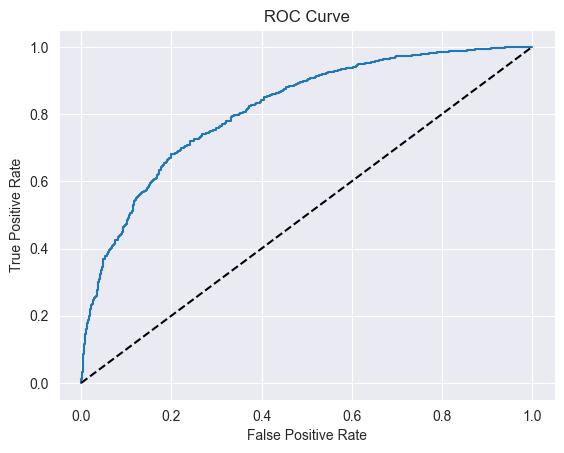

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 32)
  (embedding_driv): Embedding(396, 16)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(62, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=27, out_features=16, bias=True)
  (fc_static_2): Linear(in_features=16, out_features=16, bias=True)
  (fc): Linear(in_features=64, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
677 416
Epoch 1
train_loss : 0.6487259193542583 val_loss : 0.6037133740166486
train_accuracy : 61.44369355899767 val_accuracy : 66.46932185145317
val_precision : 61.939615736505026
Validation loss decreased (inf --> 0.603713).  Saving model ...
621 315
Epoch 2
train_loss : 0.5965219028365316 val_loss : 0.5799053467936435
train_accuracy : 68.13587704084684 val_accuracy : 68.

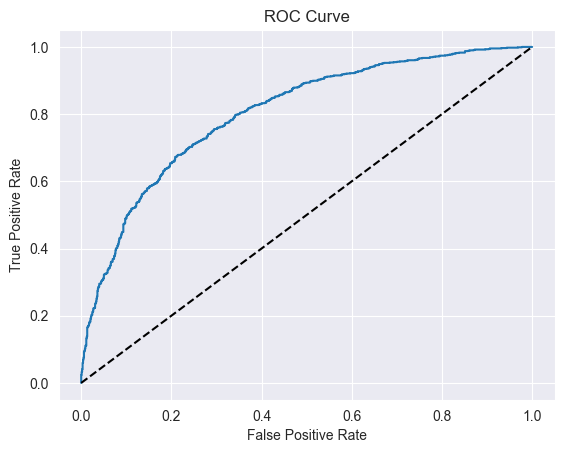

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 32)
  (embedding_driv): Embedding(396, 16)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(62, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=27, out_features=16, bias=True)
  (fc_static_2): Linear(in_features=16, out_features=16, bias=True)
  (fc): Linear(in_features=64, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
664 365
Epoch 1
train_loss : 0.6443075717749149 val_loss : 0.5967371564800457
train_accuracy : 61.99389988637043 val_accuracy : 68.51453175457482
val_precision : 64.52866861030127
Validation loss decreased (inf --> 0.596737).  Saving model ...
632 298
Epoch 2
train_loss : 0.5954929908192637 val_loss : 0.5754854123471147
train_accuracy : 68.12391603373004 val_accuracy : 70.3

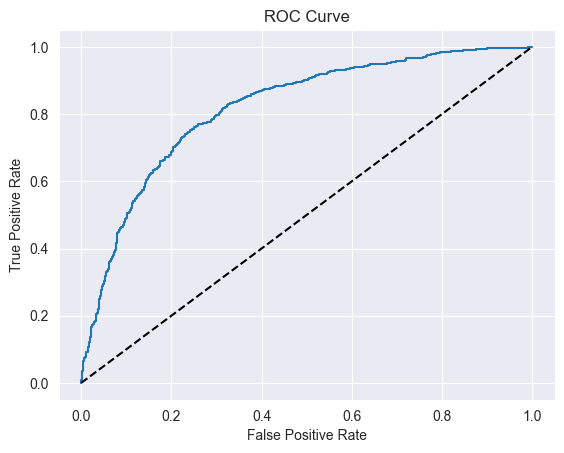

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 32)
  (embedding_driv): Embedding(396, 16)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(62, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=27, out_features=16, bias=True)
  (fc_static_2): Linear(in_features=16, out_features=16, bias=True)
  (fc): Linear(in_features=64, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
689 410
Epoch 1
train_loss : 0.6482453925773701 val_loss : 0.6052247831376932
train_accuracy : 62.095568446863226 val_accuracy : 67.43810548977395
val_precision : 62.6933575978162
Validation loss decreased (inf --> 0.605225).  Saving model ...
686 368
Epoch 2
train_loss : 0.5969640243919584 val_loss : 0.5851731724658255
train_accuracy : 67.84881287004366 val_accuracy : 69.5

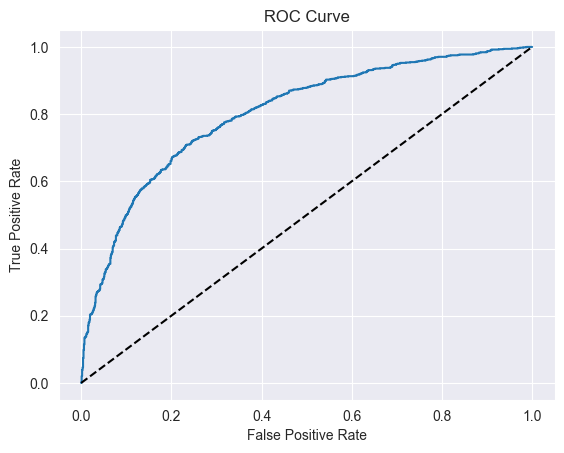

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 32)
  (embedding_driv): Embedding(396, 16)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(62, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=27, out_features=16, bias=True)
  (fc_static_2): Linear(in_features=16, out_features=16, bias=True)
  (fc): Linear(in_features=64, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
576 307
Epoch 1
train_loss : 0.6500805571361892 val_loss : 0.6181665123519251
train_accuracy : 60.827701692482506 val_accuracy : 66.89989235737353
val_precision : 65.2321630804077
Validation loss decreased (inf --> 0.618167).  Saving model ...
653 367
Epoch 2
train_loss : 0.590987068916142 val_loss : 0.5980099171905194
train_accuracy : 68.60235631840202 val_accuracy : 67.81

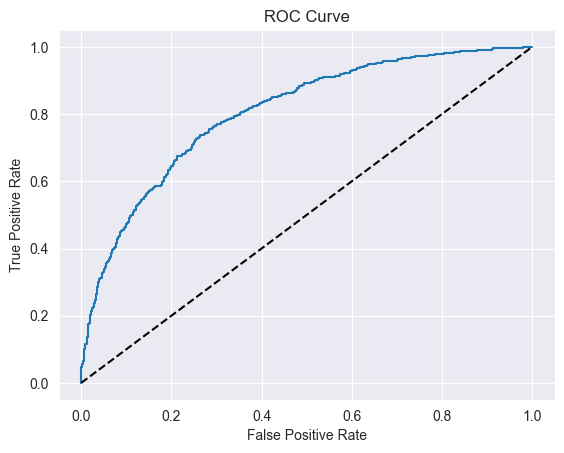

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 32)
  (embedding_driv): Embedding(396, 16)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(62, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=27, out_features=16, bias=True)
  (fc_static_2): Linear(in_features=16, out_features=16, bias=True)
  (fc): Linear(in_features=64, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
651 375
Epoch 1
train_loss : 0.6458131908572655 val_loss : 0.6026009987976592
train_accuracy : 61.712816219125656 val_accuracy : 67.27664155005382
val_precision : 63.450292397660824
Validation loss decreased (inf --> 0.602601).  Saving model ...
682 371
Epoch 2
train_loss : 0.5928476047675423 val_loss : 0.5827125694792149
train_accuracy : 68.20764308354764 val_accuracy : 69

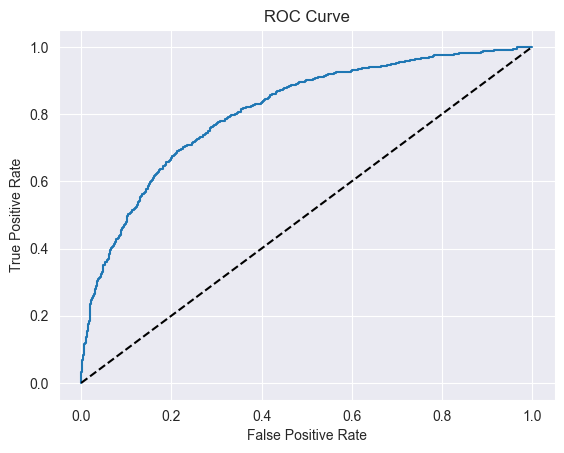

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 32)
  (embedding_driv): Embedding(396, 16)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(62, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=27, out_features=16, bias=True)
  (fc_static_2): Linear(in_features=16, out_features=16, bias=True)
  (fc): Linear(in_features=64, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
646 374
Epoch 1
train_loss : 0.6532471625572409 val_loss : 0.6080290463011143
train_accuracy : 62.68165779558639 val_accuracy : 67.0075349838536
val_precision : 63.33333333333333
Validation loss decreased (inf --> 0.608029).  Saving model ...
655 353
Epoch 2
train_loss : 0.597962288339097 val_loss : 0.5822213832604684
train_accuracy : 68.07009150170444 val_accuracy : 68.622

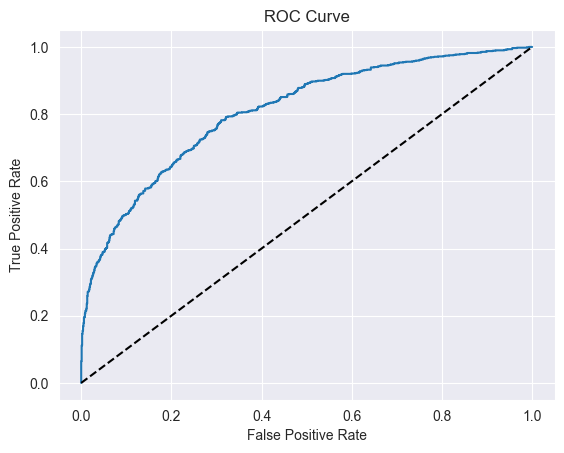

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 32)
  (embedding_driv): Embedding(396, 16)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(62, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=27, out_features=16, bias=True)
  (fc_static_2): Linear(in_features=16, out_features=16, bias=True)
  (fc): Linear(in_features=64, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
675 436
Epoch 1
train_loss : 0.646351323130026 val_loss : 0.6172148580268279
train_accuracy : 62.46635966748401 val_accuracy : 65.23143164693218
val_precision : 60.75607560756075
Validation loss decreased (inf --> 0.617215).  Saving model ...
666 393
Epoch 2
train_loss : 0.5946117775162137 val_loss : 0.6010025239596932
train_accuracy : 68.8475569642964 val_accuracy : 67.061

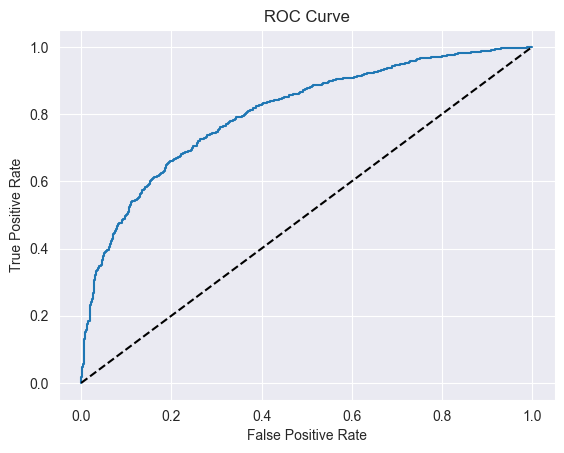

len(train_df) = 16721, len(test_df) = 1858
SentimentRNN(
  (embedding): Embedding(10708, 32)
  (embedding_driv): Embedding(396, 16)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(62, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=27, out_features=16, bias=True)
  (fc_static_2): Linear(in_features=16, out_features=16, bias=True)
  (fc): Linear(in_features=64, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
688 402
Epoch 1
train_loss : 0.6486447338392356 val_loss : 0.595122105994467
train_accuracy : 61.75467974403445 val_accuracy : 67.7610333692142
val_precision : 63.11926605504588
Validation loss decreased (inf --> 0.595122).  Saving model ...
679 347
Epoch 2
train_loss : 0.5942792106085024 val_loss : 0.5823680516016685
train_accuracy : 68.28538962980683 val_accuracy : 70.236

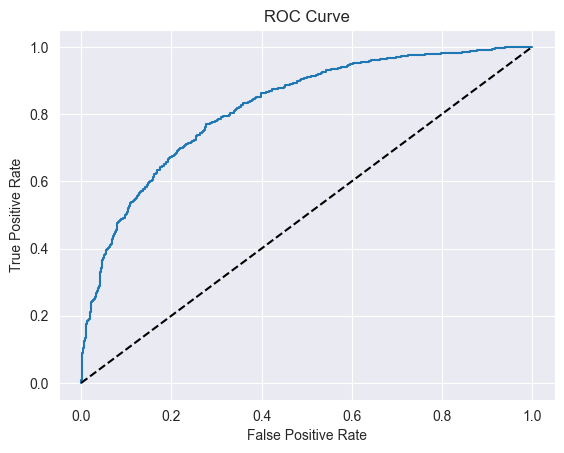

len(train_df) = 16722, len(test_df) = 1857
SentimentRNN(
  (embedding): Embedding(10708, 32)
  (embedding_driv): Embedding(396, 16)
  (embedding_len): Embedding(37, 2)
  (lstm): LSTM(62, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=27, out_features=16, bias=True)
  (fc_static_2): Linear(in_features=16, out_features=16, bias=True)
  (fc): Linear(in_features=64, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
637 365
Epoch 1
train_loss : 0.6460018585904379 val_loss : 0.6019358240951926
train_accuracy : 62.40880277478771 val_accuracy : 67.04361873990307
val_precision : 63.57285429141717
Validation loss decreased (inf --> 0.601936).  Saving model ...
647 350
Epoch 2
train_loss : 0.5925704316586883 val_loss : 0.5836477421097837
train_accuracy : 68.55041263006817 val_accuracy : 68.3

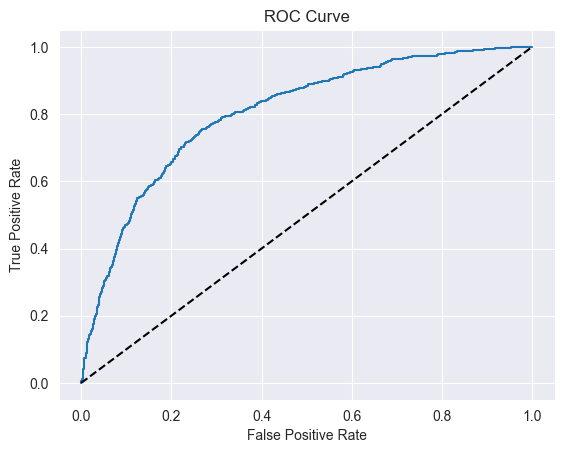

In [208]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed_value)

stats = []

FEATURE_COLUMNS = ['routes', 'driver_id_feature','experience_feature', 'len_feature', 'day_of_week_feature', 'country_flag', 'location_is_depot', 'location_type_id', 'distance_route']


class DataFrameDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        item = {}
        for col in FEATURE_COLUMNS:
            feature = self.df[col].iloc[idx]
            if isinstance(feature, list):
                feature = padding_([feature], max_route_length)[0]
            item[col] = feature
        item['label'] = self.df['label'].iloc[idx]
        return item, item['label']

def get_data_loaders(train_df, test_df):
    # create Tensor datasets
    train_data = DataFrameDataset(train_df)
    valid_data = DataFrameDataset(test_df)

    # dataloaders
    batch_size = 32

    # make sure to SHUFFLE your data
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    return train_loader, valid_loader

shuffled_df = final_routes.sample(frac=1, random_state=42).reset_index(drop=True)

for train_index, test_index in kf.split(shuffled_df, shuffled_df['label']):
    train_df = shuffled_df.iloc[train_index]
    test_df = shuffled_df.iloc[test_index]

    train_loader, valid_loader = get_data_loaders(train_df, test_df)
    print(f'len(train_df) = {len(train_df)}, len(test_df) = {len(test_df)}')
    model = get_model()
    model.train()

    train_model((train_loader, valid_loader), model, epochs=23)
    stats.append(get_stats(model, valid_loader))

acc: 0.7364769385671879
precision: 0.7280482124377878
recall: 0.7144595700079249
f1: 0.7205887011553557
roc_auc: 0.8091773111831794
average_precision: 0.7894437181889224
quadratic_loss: 0.3704342174506967
brier_score: 0.18521710867956334


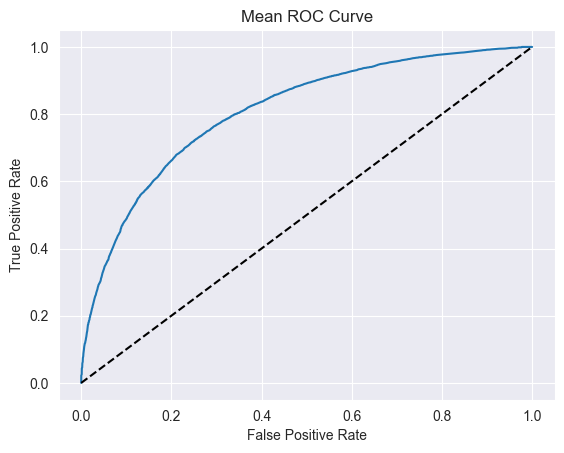

In [209]:
def get_mean_stat(stats, stat_name):
    if stat_name in ["fpr", "tpr"]:
        # Calculate mean fpr and tpr
        values = [item[stat_name] for item in stats]
        min_len = min(len(value) for value in values)
        interpolated_values = []
        for value in values:
            interpolated = np.interp(np.linspace(0, 1, min_len), np.linspace(0, 1, len(value)), value)
            interpolated_values.append(interpolated)
        mean_values = np.array(interpolated_values).mean(axis=0)
        return mean_values
    else:
        # Calculate mean for other stats
        arr = np.array([item[stat_name] for item in stats])
        return arr.mean()

print('acc:', get_mean_stat(stats, 'acc'))
print('precision:', get_mean_stat(stats, 'precision'))
print('recall:', get_mean_stat(stats, 'recall'))
print('f1:', get_mean_stat(stats, 'f1'))
print('roc_auc:', get_mean_stat(stats, 'roc_auc'))
print('average_precision:', get_mean_stat(stats, 'average_precision'))
print('quadratic_loss:', get_mean_stat(stats, 'quadratic_loss'))
print('brier_score:', get_mean_stat(stats, 'brier_score'))
mean_fpr = get_mean_stat(stats, 'fpr')
mean_tpr = get_mean_stat(stats, 'tpr')

plt.plot(mean_fpr, mean_tpr)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.show()

In [107]:
# from sklearn.model_selection import train_test_split
#
# reset_random()
# X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=seed_value)
# train_loader, valid_loader = get_data_loaders(X_train, y_train, X_val, y_val)
#
# model = get_model()
# # summary(model, input_size=(1,9))
# model.train()
#
# train_model((train_loader, valid_loader), model, epochs=50)
#
# get_stats(model, valid_loader)

In [108]:
get_stats(model, valid_loader)
# def get_mean_stat(stats, stat_name) -> float:
#     return np.array([item[stat_name] for item in stats]).mean()
#
# print('acc:', get_mean_stat(stats, 'acc'))
# print('precision:', get_mean_stat(stats, 'precision'))
# print('recall:', get_mean_stat(stats, 'recall'))
# print('f1:', get_mean_stat(stats, 'f1'))
# print('roc_auc:', get_mean_stat(stats, 'roc_auc'))
# print('average_precision:', get_mean_stat(stats, 'average_precision'))

torch.Size([32, 36, 16]) torch.Size([32, 36, 2]) torch.Size([32, 36, 7]) torch.Size([32, 36]) torch.Size([32, 36])


RuntimeError: Tensors must have same number of dimensions: got 3 and 2

In [ ]:
print(stats)

In [ ]:
print(model.fc.weight)